In [ ]:
!pip install kaggle networkx matplotlib seaborn scikit-learn nltk vaderSentiment textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Upload kaggle.json
from google.colab import files
files.upload()

# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**1.	Build a spam classifier using TF-IDF and Naive Bayes on SMS data.**

In [ ]:
# Download the dataset
!kaggle datasets download -d uciml/sms-spam-collection-dataset
!unzip sms-spam-collection-dataset.zip

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Preprocess the data
X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                
Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



**2.	Perform hashtag frequency analysis from a COVID-19 tweet dataset.**

Dataset URL: https://www.kaggle.com/datasets/gpreda/covid19-tweets
License(s): CC0-1.0
Archive:  covid19-tweets.zip
  inflating: covid19_tweets.csv      


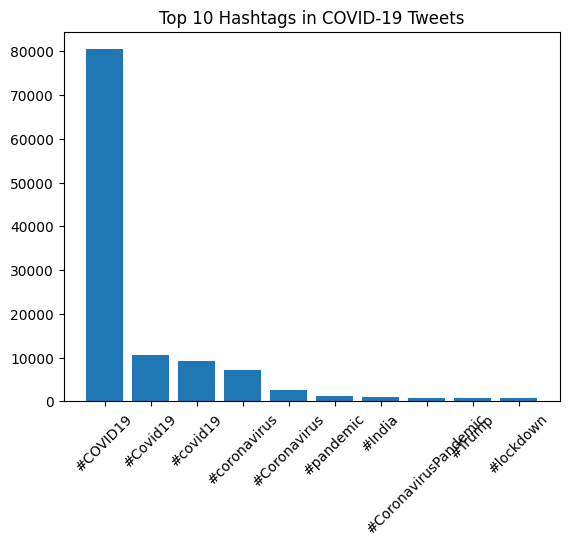

In [ ]:
# Download the dataset
!kaggle datasets download -d gpreda/covid19-tweets
!unzip covid19-tweets.zip

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the dataset
df = pd.read_csv('covid19_tweets.csv')

# Extract hashtags
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

df['hashtags'] = df['text'].apply(extract_hashtags)

# Flatten the list of hashtags
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]

# Count the frequency
hashtag_freq = Counter(all_hashtags)

# Get the top 10 hashtags
top_hashtags = hashtag_freq.most_common(10)

# Plot the frequency
labels, counts = zip(*top_hashtags)
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title('Top 10 Hashtags in COVID-19 Tweets')
plt.show()

**3.	Use TF-IDF and cosine similarity to find similar product descriptions in an e-commerce dataset.**

In [ ]:
# Short code for TF-IDF and cosine similarity on Flipkart products dataset

# Import necessary libraries
import pandas as pd
import re
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download the dataset from Kaggle
!kaggle datasets download -d aaditshukla/flipkart-fasion-products-dataset
!unzip -q flipkart-fasion-products-dataset.zip

# Load the dataset (JSON file)
with open('flipkart_fashion_products_dataset.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
print("Available columns:", df.columns.tolist())
print(df[['title', 'category', 'sub_category', 'description']].head(2))

# Basic preprocessing of product descriptions
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase and remove special chars
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        # Remove extra whitespace
        return re.sub(r'\s+', ' ', text).strip()
    return ''

# Apply text cleaning
df['clean_description'] = df['description'].apply(clean_text)
df = df[df['clean_description'] != ''].reset_index(drop=True)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_description'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Function to find similar products
def find_similar_products(product_idx, top_n=5):
    """Find top N similar products to the product at given index"""
    # Get the TF-IDF vector for the product
    product_vector = tfidf_matrix[product_idx:product_idx+1]

    # Calculate cosine similarity with all products
    similarity_scores = cosine_similarity(product_vector, tfidf_matrix).flatten()

    # Get indices of top similar products (excluding the product itself)
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]

    # Get similarity scores for the top products
    similar_scores = similarity_scores[similar_indices]

    # Display results
    print(f"\nSimilar products to: {df['title'].iloc[product_idx]}")
    print(f"Category: {df['category'].iloc[product_idx]}, Sub-category: {df['sub_category'].iloc[product_idx]}")

    print("\nTop similar products:")
    for i, (idx, score) in enumerate(zip(similar_indices, similar_scores)):
        print(f"{i+1}. {df['title'].iloc[idx]} (Similarity: {score:.3f})")
        print(f"   Category: {df['category'].iloc[idx]}, Sub-category: {df['sub_category'].iloc[idx]}")

    return similar_indices, similar_scores

# Search for products by name
def search_product(name):
    """Search for products containing the given name"""
    matches = df[df['title'].str.contains(name, case=False, na=False)]

    if matches.empty:
        print(f"No products found containing '{name}'")
        return None

    print(f"Found {len(matches)} matches. Top 5:")
    for i, (idx, row) in enumerate(matches.iloc[:5].iterrows()):
        print(f"{i+1}. Index {idx}: {row['title']}")

    return matches

# Example usage
print("\n--- Example: Search for a product and find similar items ---")
# Try to find a common product type
for term in ['shirt', 'dress', 'kurta', 'jeans', 'saree']:
    print(f"\nSearching for '{term}'...")
    matches = search_product(term)
    if matches is not None and not matches.empty:
        example_idx = matches.index[0]
        find_similar_products(example_idx)
        break

Dataset URL: https://www.kaggle.com/datasets/aaditshukla/flipkart-fasion-products-dataset
License(s): other
flipkart-fasion-products-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace flipkart_fashion_products_dataset.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace output.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
Dataset shape: (30000, 17)
Available columns: ['_id', 'actual_price', 'average_rating', 'brand', 'category', 'crawled_at', 'description', 'discount', 'images', 'out_of_stock', 'pid', 'product_details', 'seller', 'selling_price', 'sub_category', 'title', 'url']
                              title                  category sub_category  \
0  Solid Men Multicolor Track Pants  Clothing and Accessories   Bottomwear   
1        Solid Men Blue Track Pants  Clothing and Accessories   Bottomwear   

                                         description  
0  Yorker trackpants made from 100% rich combed c...  
1  Yorker trackpa

**4.	Analyze LinkedIn job postings using TF-IDF to identify in-demand skills.**

In [ ]:
# Download the dataset
!kaggle datasets download -d rajatraj0502/linkedin-job-2023
!unzip linkedin-job-2023.zip

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load the dataset
df = pd.read_csv('job_postings.csv')

# Use job descriptions
descriptions = df['description'].fillna('')

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(descriptions)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF scores for each term
tfidf_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Get top 10 skills
top_indices = tfidf_sums.argsort()[-10:][::-1]
top_skills = [feature_names[i] for i in top_indices]

print("Top 10 In-Demand Skills:", top_skills)

Dataset URL: https://www.kaggle.com/datasets/rajatraj0502/linkedin-job-2023
License(s): CC-BY-SA-4.0
Archive:  linkedin-job-2023.zip
  inflating: benefits.csv            
  inflating: companies.csv           
  inflating: company_industries.csv  
  inflating: company_specialities.csv  
  inflating: employee_counts.csv     
  inflating: job_industries.csv      
  inflating: job_postings.csv        
  inflating: job_skills.csv          
Top 10 In-Demand Skills: ['experience', 'work', 'team', 'sales', 'business', 'customer', 'skills', 'ability', 'job', 'management']


**5.	Create a social network graph using retweet data. Find influencer nodes using centrality measures.italicized text**

Loading graph...
Graph loaded: 25442 nodes, 20000 edges
Calculating centrality measures...

Top influencers by in-degree centrality:
1. Node 88: 0.0321
2. Node 14454: 0.0150
3. Node 677: 0.0136
4. Node 1988: 0.0107
5. Node 349: 0.0068
6. Node 519: 0.0049
7. Node 6948: 0.0046
8. Node 3571: 0.0044
9. Node 3549: 0.0044
10. Node 9964: 0.0044

Top influencers by PageRank:
1. Node 88: 0.0165
2. Node 14454: 0.0074
3. Node 677: 0.0066
4. Node 1988: 0.0061
5. Node 349: 0.0034
6. Node 519: 0.0030
7. Node 3549: 0.0026
8. Node 6948: 0.0023
9. Node 3571: 0.0022
10. Node 9964: 0.0022


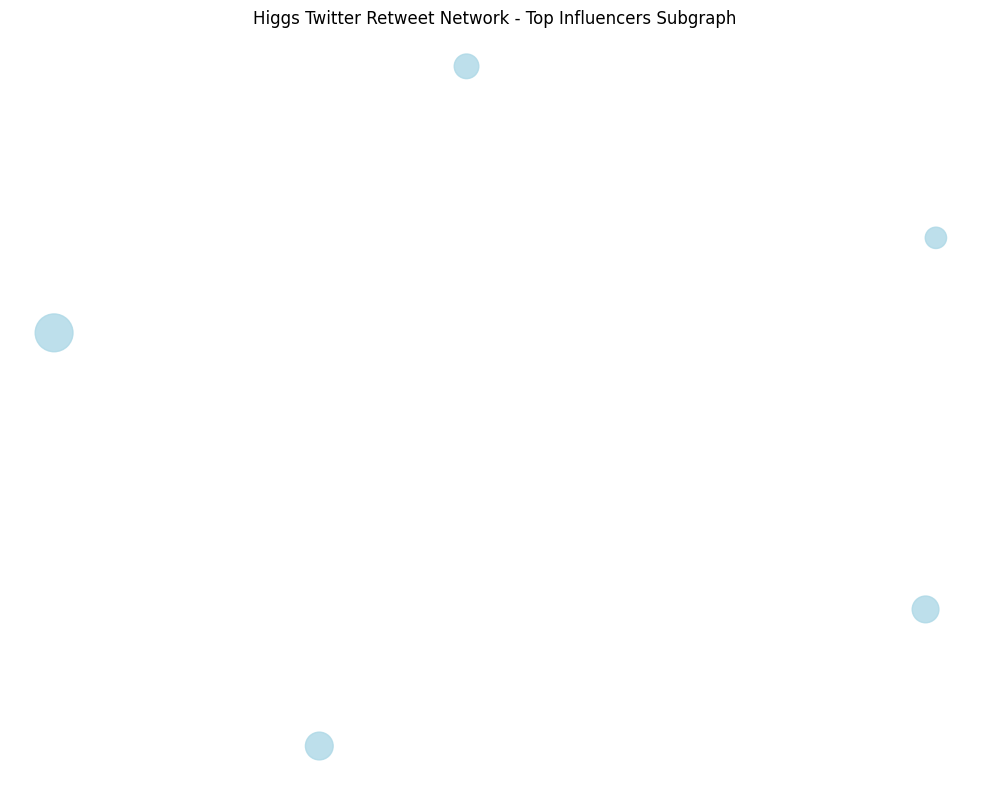

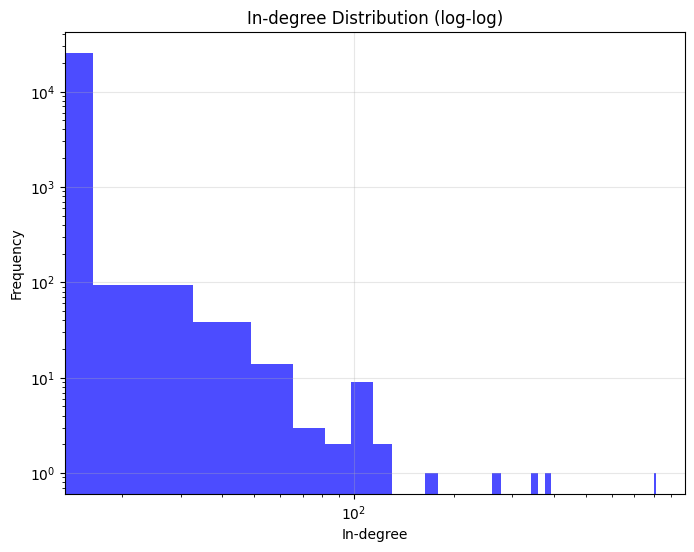

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import gzip
import urllib.request
import os

# Download the dataset
url = "http://snap.stanford.edu/data/higgs-retweet_network.edgelist.gz"
file_name = "higgs-retweet_network.edgelist.gz"

if not os.path.exists(file_name):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, file_name)
    print("Download complete!")

# Load the graph from the gzipped edgelist file
G = nx.DiGraph()

print("Loading graph...")
with gzip.open(file_name, 'rt') as f:
    # Only read first 20,000 edges for demonstration (remove this limit for full analysis)
    for i, line in enumerate(f):
        if i >= 20000:  # Limit for faster processing
            break
        parts = line.strip().split()
        if len(parts) >= 2:  # Make sure we have at least source and target
            source, target = map(int, parts[:2])  # Only take the first two values
            G.add_edge(source, target)

print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Calculate centrality measures to identify influencers
print("Calculating centrality measures...")

# In-degree centrality (how many users retweeted this user)
in_degree = nx.in_degree_centrality(G)
# PageRank centrality
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100)
# Betweenness centrality (on a sample for efficiency)
# betweenness = nx.betweenness_centrality(G, k=100)  # Use sampling for large graphs

# Get top influencers
top_n = 10
top_indegree = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:top_n]

print("\nTop influencers by in-degree centrality:")
for i, (node, score) in enumerate(top_indegree, 1):
    print(f"{i}. Node {node}: {score:.4f}")

print("\nTop influencers by PageRank:")
for i, (node, score) in enumerate(top_pagerank, 1):
    print(f"{i}. Node {node}: {score:.4f}")

# Visualize a smaller portion of the network for clarity
# Extract a subgraph containing top influencers and their connections
top_nodes = set([node for node, _ in top_indegree[:5]] + [node for node, _ in top_pagerank[:5]])
subgraph = G.subgraph(list(top_nodes) + list(nx.neighbors(G, list(top_nodes)[0]))[:20])

# Visualize
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph, seed=42)

# Draw nodes with size proportional to in-degree
node_size = [in_degree.get(node, 0) * 20000 + 100 for node in subgraph.nodes()]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(subgraph, pos, alpha=0.2, arrows=True, arrowsize=10)

plt.title("Higgs Twitter Retweet Network - Top Influencers Subgraph")
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot in-degree distribution (power law check)
in_degrees = [d for n, d in G.in_degree()]
plt.figure(figsize=(8, 6))
plt.hist(in_degrees, bins=50, alpha=0.7, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.title('In-degree Distribution (log-log)')
plt.xlabel('In-degree')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**6.	Analyze social network structure using Facebook page-page network. Identify clusters and calculate modularity.**

--2025-05-04 18:22:30--  http://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   203KB/s    in 1.1s    

2025-05-04 18:22:32 (203 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]

Modularity: 0.8349415477451287


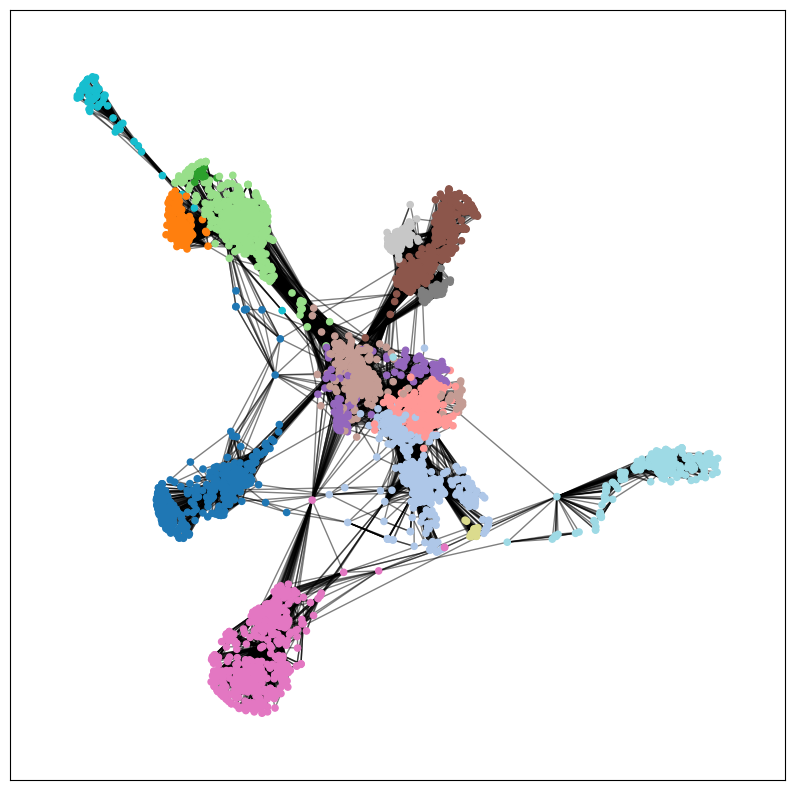

In [ ]:
# Download the dataset
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz
!gunzip facebook_combined.txt.gz

# Import necessary libraries
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Load the edgelist
G = nx.read_edgelist('facebook_combined.txt')

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

# Calculate modularity
modularity = community_louvain.modularity(partition, G)
print("Modularity:", modularity)

# Visualize the network with communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.tab20, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

**7.	Use NetworkX to analyze political blog network and find opinion leaders.**

In [ ]:
# Download the dataset
!wget http://snap.stanford.edu/data/polblogs.gml

# Import necessary libraries
import networkx as nx

# Load the graph
G = nx.read_gml('polblogs.gml')

# Calculate centrality measures, e.g., betweenness centrality
betweenness = nx.betweenness_centrality(G)
top_leaders = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Opinion Leaders by Betweenness Centrality:", top_leaders)

--2025-05-04 18:25:00--  http://snap.stanford.edu/data/polblogs.gml
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-04 18:25:00 ERROR 404: Not Found.



FileNotFoundError: [Errno 2] No such file or directory: 'polblogs.gml'

**8.	Visualize co-occurrence network from Amazon product reviews using NetworkX.**

Dataset URL: https://www.kaggle.com/datasets/rogate16/amazon-reviews-2018-full-dataset
License(s): other
amazon-reviews-2018-full-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  amazon-reviews-2018-full-dataset.zip
replace amazon_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amazon_reviews.csv      y



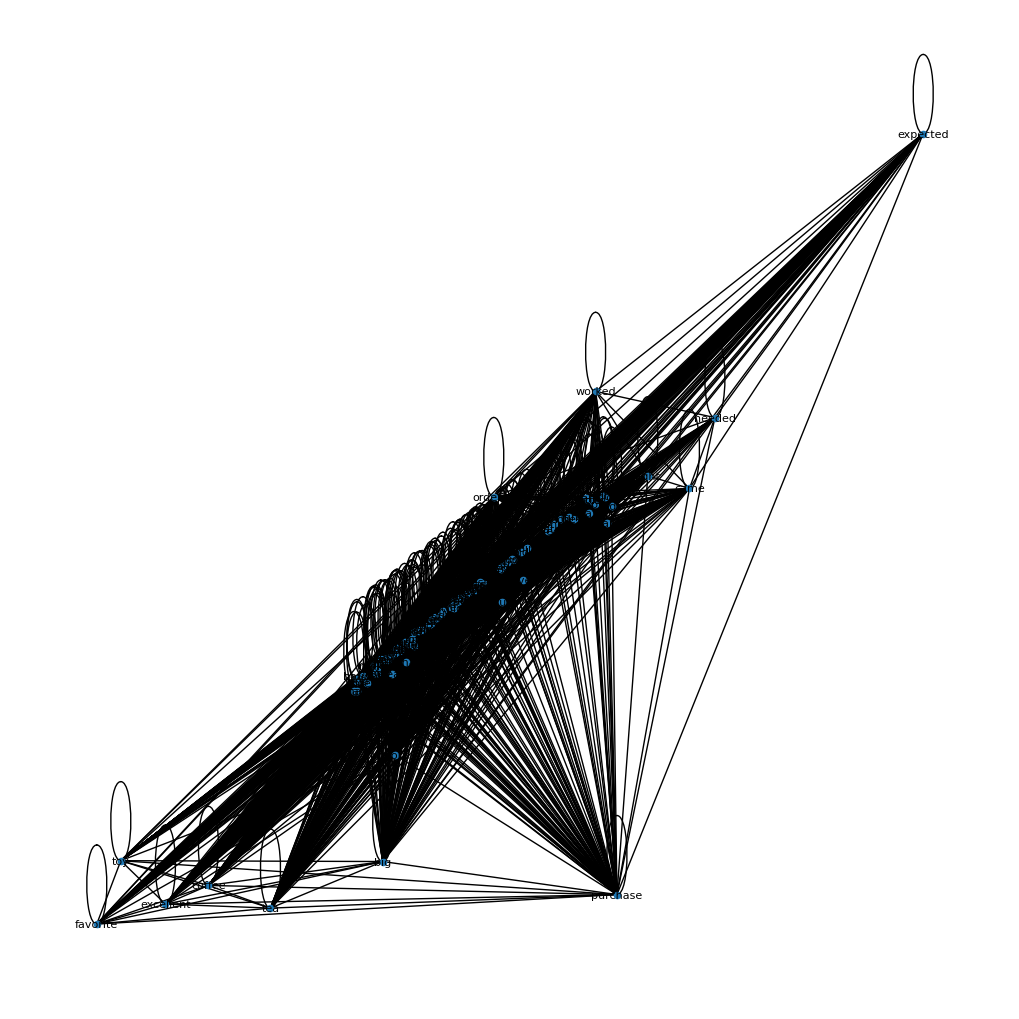

In [ ]:
# Download the dataset
!kaggle datasets download -d rogate16/amazon-reviews-2018-full-dataset
!unzip amazon-reviews-2018-full-dataset.zip

# Import necessary libraries
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('amazon_reviews.csv')

# Use review texts, fill missing values
reviews = df['reviewText'].fillna('')

# Vectorize the text to get word frequencies (adjust max_features as needed)
vectorizer = CountVectorizer(stop_words='english', max_features=100)
word_matrix = vectorizer.fit_transform(reviews)
words = vectorizer.get_feature_names_out()

# Create co-occurrence matrix
co_occurrence = (word_matrix.T * word_matrix)
co_occurrence.setdiag(0)

# Create graph from co-occurrence matrix
G = nx.from_scipy_sparse_array(co_occurrence)

# Relabel nodes with actual words
nx.relabel_nodes(G, {i: words[i] for i in range(len(words))}, copy=False)

# Draw the network
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=20, font_size=8)
plt.savefig('co_occurrence_network.png')  # Save instead of show for compatibility

**9.	Perform sentiment analysis on Twitter data about airlines. Classify tweets into positive, negative, and neutral categories. Evaluate with accuracy, precision, recall, and F1-score.**

In [ ]:
# Download the dataset
!kaggle datasets download -d crowdflower/twitter-airline-sentiment
!unzip twitter-airline-sentiment.zip

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('Tweets.csv')

# Preprocess the data
X = df['text']
y = df['airline_sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0
Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         
Accuracy: 0.7937158469945356
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      1889
     neutral       0.64      0.49      0.55       580
    positive       0.78      0.67      0.72       459

    accuracy                           0.79      2928
   macro avg       0.75      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



**10.	Apply VADER/TextBlob to analyze sentiments of Amazon product reviews. Visualize sentiment distribution.**

In [ ]:
# Download the dataset
!kaggle datasets download -d arhamrumi/amazon-product-reviews
!unzip amazon-product-reviews.zip

# Import necessary libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Reviews.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiments
df['sentiment'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiments
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Visualize sentiment distribution
df['sentiment_class'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

Dataset URL: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews
License(s): CC0-1.0
Archive:  amazon-product-reviews.zip
  inflating: Reviews.csv             


**11.	Analyze IMDb movie reviews using TF-IDF and implement a logistic regression classifier.**

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

df = pd.read_csv('IMDB Dataset.csv')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep only letters
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(preprocess_text)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**12.	Perform comparative sentiment analysis for Patanjali vs HUL using pre-downloaded tweet data.**

In [ ]:
!kaggle datasets download -d tusharpaul2001/brand-sentiment-analysis-dataset
!unzip brand-sentiment-analysis-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/tusharpaul2001/brand-sentiment-analysis-dataset
License(s): MIT
Archive:  brand-sentiment-analysis-dataset.zip
  inflating: Dataset - Test.csv      
  inflating: Dataset - Train.csv     
  inflating: Dataset Card.csv        


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load both train and test datasets
train_df = pd.read_csv('Dataset - Train.csv')
test_df = pd.read_csv('Dataset - Test.csv')

# Combine train and test datasets
df = pd.concat([train_df, test_df], ignore_index=True)

# Print column names
print("Column Names:", df.columns.tolist())

# Inspect unique values in 'emotion_in_tweet_is_directed_at'
print("\nUnique values in 'emotion_in_tweet_is_directed_at':")
print(df['emotion_in_tweet_is_directed_at'].unique())

# Print sample tweets to understand 'tweet_text' and 'Tweet' columns
print("\nSample 'tweet_text' (first 5):")
print(df['tweet_text'].head(5))
print("\nSample 'Tweet' (first 5):")
print(df['Tweet'].head(5))

# Search both 'tweet_text' and 'Tweet' for Patanjali and HUL
patanjali_tweets = df[
    df['tweet_text'].str.contains('Patanjali', case=False, na=False) |
    df['Tweet'].str.contains('Patanjali', case=False, na=False)
]
hul_tweets = df[
    df['tweet_text'].str.contains('HUL|Hindustan Unilever', case=False, na=False) |
    df['Tweet'].str.contains('HUL|Hindustan Unilever', case=False, na=False)
]

# Drop rows with missing tweet text
patanjali_tweets = patanjali_tweets.dropna(subset=['tweet_text'])
hul_tweets = hul_tweets.dropna(subset=['tweet_text'])

# Define sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to 'tweet_text'
patanjali_tweets['sentiment'] = patanjali_tweets['tweet_text'].apply(get_sentiment)
hul_tweets['sentiment'] = hul_tweets['tweet_text'].apply(get_sentiment)

# Calculate sentiment counts
patanjali_sentiment_counts = patanjali_tweets['sentiment'].value_counts()
hul_sentiment_counts = hul_tweets['sentiment'].value_counts()

# Calculate total tweets for percentages
patanjali_total = len(patanjali_tweets)
hul_total = len(hul_tweets)

# Print sentiment counts
print("\nPatanjali Sentiment Counts:\n", patanjali_sentiment_counts)
print("\nHUL Sentiment Counts:\n", hul_sentiment_counts)

# Print sentiment percentages
print("\nPatanjali Sentiment Percentages:")
for sentiment in ['positive', 'negative', 'neutral']:
    count = patanjali_sentiment_counts.get(sentiment, 0)
    percentage = (count / patanjali_total * 100) if patanjali_total > 0 else 0
    print(f"{sentiment.capitalize()}: {percentage:.2f}%")

print("\nHUL Sentiment Percentages:")
for sentiment in ['positive', 'negative', 'neutral']:
    count = hul_sentiment_counts.get(sentiment, 0)
    percentage = (count / hul_total * 100) if hul_total > 0 else 0
    print(f"{sentiment.capitalize()}: {percentage:.2f}%")

# If no tweets are found, suggest alternative data collection
if patanjali_total == 0 and hul_total == 0:
    print("\nWarning: No tweets found for Patanjali or HUL. This dataset may not contain relevant data.")
    print("Consider collecting tweets using snscrape or the Twitter API.")
else:
    print("\nNote: Limited data found. For better results, consider collecting more tweets.")


Column Names: ['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product', 'Tweet']

Unique values in 'emotion_in_tweet_is_directed_at':
['iPhone' 'iPad or iPhone App' 'iPad' 'Google' nan 'Android' 'Apple'
 'Android App' 'Other Google product or service'
 'Other Apple product or service']

Sample 'tweet_text' (first 5):
0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

Sample 'Tweet' (first 5):
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Tweet, dtype: object

Patanjali Sentiment Counts:
 Series([], Name: count, dtype: int64)

HUL Sentiment Counts:
 sentiment
positive    1
Name: count, dtype: int64

Patanjali Sentiment Percentages:
Positive: 0.00%
Negative: 0.00%
Neutral: 0.00%

HUL S

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import datetime, timedelta

# Define search parameters
search_terms = ["Patanjali", "Patanjali Ayurved", "Ramdev Patanjali",
                "Dant Kanti", "Patanjali products", "Divya Pharmacy"]

# Set date range (last 3 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=90)
start_date_str = start_date.strftime("%Y-%m-%d")
end_date_str = end_date.strftime("%Y-%m-%d")

# Create empty list to store tweets
tweets_list = []

# Collect tweets for each search term
for term in search_terms:
    # Define query string with search term and date filter
    query = f"{term} since:{start_date_str} until:{end_date_str} lang:en -filter:replies"

    # Collect tweets
    print(f"Collecting tweets for: {term}")
    count = 0

    # Limit to 500 tweets per search term for demonstration purposes
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i >= 500:
            break

        tweets_list.append({
            'date': tweet.date,
            'id': tweet.id,
            'content': tweet.content,
            'username': tweet.user.username,
            'search_term': term,
            'likes': tweet.likeCount,
            'retweets': tweet.retweetCount,
            'replies': tweet.replyCount
        })
        count += 1

    print(f"Collected {count} tweets for {term}")

# Create DataFrame from collected tweets
patanjali_df = pd.DataFrame(tweets_list)

# Save to CSV
patanjali_df.to_csv('patanjali_tweets.csv', index=False)
print(f"Total tweets collected: {len(patanjali_df)}")

**13.	Build a word cloud and perform n-gram analysis on Yelp restaurant reviews. Identify common complaint areas.**

In [ ]:
!kaggle datasets download -d yelp-dataset/yelp-dataset
!unzip yelp-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset
License(s): other
Archive:  yelp-dataset.zip
  inflating: Dataset_User_Agreement.pdf  
  inflating: yelp_academic_dataset_business.json  
  inflating: yelp_academic_dataset_checkin.json  
  inflating: yelp_academic_dataset_review.json  
  inflating: yelp_academic_dataset_tip.json  
  inflating: yelp_academic_dataset_user.json  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of restaurants: 52268
Number of negative reviews sampled: 1326


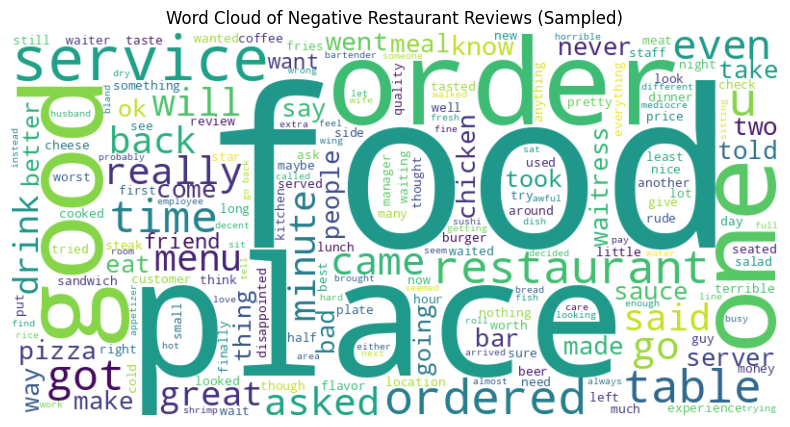

Top 10 bigrams (potential complaint areas): [(('of', 'the'), 532), (('it', 'was'), 453), (('in', 'the'), 405), (('and', 'the'), 399), (('on', 'the'), 330), (('to', 'the'), 319), (('I', 'was'), 311), (('and', 'I'), 281), (('to', 'be'), 279), (('for', 'the'), 267)]


In [ ]:
# Import libraries
import pandas as pd
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import bigrams
from collections import Counter
import nltk

# Download NLTK data
nltk.download('punkt')

# Step 1: Load and filter restaurants
businesses = []
with open('yelp_academic_dataset_business.json', 'r') as f:
    for line in f:
        businesses.append(json.loads(line))
business_df = pd.DataFrame(businesses)
restaurant_ids = set(business_df[business_df['categories'].str.contains('Restaurants', na=False)]['business_id'])
print(f"Number of restaurants: {len(restaurant_ids)}")

# Step 2: Sample negative restaurant reviews
max_reviews = 10000  # Small subset
negative_reviews = []
with open('yelp_academic_dataset_review.json', 'r') as f:
    for i, line in enumerate(f):
        if i >= max_reviews:
            break
        review = json.loads(line)
        if review['business_id'] in restaurant_ids and review['stars'] < 3:
            negative_reviews.append(review['text'])
print(f"Number of negative reviews sampled: {len(negative_reviews)}")

# Step 3: Generate word cloud and bigram analysis
text = ' '.join([str(t) for t in negative_reviews])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Restaurant Reviews (Sampled)')
plt.show()

words = text.split()
bigram_list = list(bigrams(words))
bigram_freq = Counter(bigram_list)
print("Top 10 bigrams (potential complaint areas):", bigram_freq.most_common(10))

14.	Use news headlines to classify fake vs real news using NLP methods.
 🔗 Dataset: Kaggle - Fake and Real News Dataset **bold text**


In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip fake-and-real-news-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

fake_df = pd.read_csv('Fake.csv')
real_df = pd.read_csv('True.csv')
fake_df['label'] = 0
real_df['label'] = 1
df = pd.concat([fake_df, real_df], ignore_index=True)
X = df['title']
y = df['label']
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9523385300668151
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4733
           1       0.94      0.96      0.95      4247

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



**15.	Compare website traffic metrics (bounce rate, visit duration) of two education sites using SimilarWeb or pre-downloaded datasets.**

In [ ]:
!kaggle datasets download -d sandeepkumar69/website-traffic-data
!unzip website-traffic-data.zip

Dataset URL: https://www.kaggle.com/datasets/sandeepkumar69/website-traffic-data
License(s): unknown
Archive:  website-traffic-data.zip
  inflating: traffic.csv             


In [ ]:
# Install Kaggle API
!pip install kaggle

# Download and unzip the dataset
!kaggle datasets download -d sandeepkumar69/website-traffic-data
!unzip -o website-traffic-data.zip

# Import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('traffic.csv')

# Print column names and sample data
print("Column Names:", df.columns.tolist())
print("\nSample Data:\n", df.head())

# Warn about missing columns
print("\nWarning: The dataset lacks 'domain', 'category', 'bounce_rate', and 'visit_duration' columns.")
print("Cannot compare education sites as requested. Performing basic analysis of visits instead.")

# Basic analysis: Average visits per month
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)
df['Month'] = df['Date'].dt.to_period('M')
monthly_visits = df.groupby('Month')['Visits'].mean().round(2)
print("\nAverage Visits per Month:\n", monthly_visits)

# Guidance for next steps
print("\nNext Steps:")
print("1. Verify the correct dataset on Kaggle: https://www.kaggle.com/datasets/sandeepkumar69/website-traffic-data")
print("2. Look for additional files or a dataset with 'domain', 'bounce_rate', and 'visit_duration'.")
print("3. Example dataset structure needed:")
print("   Columns: ['domain', 'category', 'bounce_rate', 'visit_duration', ...]")
print("4. Example: Use a dataset like 'Web Analytics Data' with site-specific metrics.")
print("5. Alternatively, collect data using tools like SimilarWeb or Google Analytics APIs.")

Dataset URL: https://www.kaggle.com/datasets/sandeepkumar69/website-traffic-data
License(s): unknown
website-traffic-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  website-traffic-data.zip
  inflating: traffic.csv             
Column Names: ['Date', 'Visits']

Sample Data:
          Date  Visits
0  01-01-2020  1554.0
1  01-02-2020  2820.0
2  01-03-2020  2970.0
3  01-04-2020  2111.0
4  01-05-2020  2393.0

Cannot compare education sites as requested. Performing basic analysis of visits instead.

Average Visits per Month:
 Month
2020-01    3435.23
2020-02    4176.00
2020-03    3902.35
2020-04    5048.07
2020-05    5032.94
2020-06    4156.10
2020-07    3431.84
2020-08    3146.89
Freq: M, Name: Visits, dtype: float64

Next Steps:
1. Verify the correct dataset on Kaggle: https://www.kaggle.com/datasets/sandeepkumar69/website-traffic-data
2. Look for additional files or a dataset with 'domain', 'bounce_rate', and 'visit_duration'.
3. Exam

**16.	Analyze clickstream data to understand user navigation paths across web pages.**

In [ ]:
!kaggle datasets download -d tunguz/clickstream-data-for-online-shopping
!unzip clickstream-data-for-online-shopping.zip

Dataset URL: https://www.kaggle.com/datasets/tunguz/clickstream-data-for-online-shopping
License(s): CC0-1.0
Archive:  clickstream-data-for-online-shopping.zip
  inflating: e-shop clothing 2008.csv  


In [ ]:
# Import libraries
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv('e-shop clothing 2008.csv', sep=';')

# Print column names and sample data
print("Column Names:", df.columns.tolist())
print("\nSample Data:\n", df.head())

# Print unique values for 'page' to understand page types
print("\nUnique Page Values:\n", df['page'].unique())

# Sort data by session ID and order
df = df.sort_values(by=['session ID', 'order'])

# Group by session ID to get page paths
paths = df.groupby('session ID')['page'].apply(list)

# Count page transitions
transitions = []
for path in paths:
    for i in range(len(path)-1):
        transitions.append((path[i], path[i+1]))
transition_counts = Counter(transitions)
print("\nTop 10 page transitions:", transition_counts.most_common(10))


Column Names: ['year', 'month', 'day', 'order', 'country', 'session ID', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']

Sample Data:
    year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6  

**17.	Perform user behavior segmentation on mobile web data using clustering (K-means).**

In [ ]:
!kaggle datasets download -d valakhorasani/mobile-device-usage-and-user-behavior-dataset
!unzip mobile-device-usage-and-user-behavior-dataset.zip

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/username/mobile-app-web-behavior
unzip:  cannot find or open mobile-app-web-behavior.zip, mobile-app-web-behavior.zip.zip or mobile-app-web-behavior.zip.ZIP.


Dataset URL: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset
License(s): apache-2.0
mobile-device-usage-and-user-behavior-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mobile-device-usage-and-user-behavior-dataset.zip
  inflating: user_behavior_dataset.csv  
Column Names: ['User ID', 'Device Model', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class']

Sample Data:
    User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPh

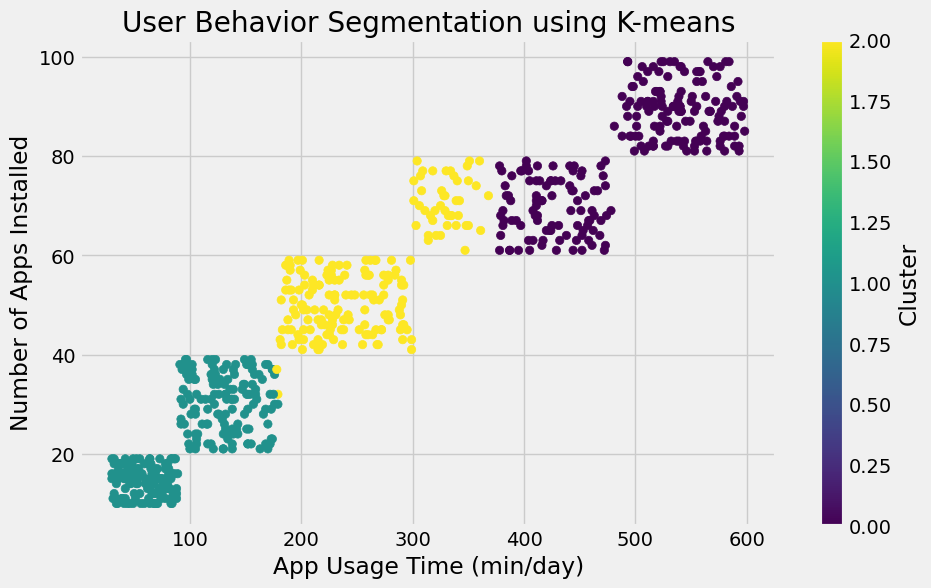

Cluster Centers:
[[494.08658009  81.13852814]
 [ 97.46808511  22.94326241]
 [257.59358289  54.88770053]]

Note:
1. Features used: 'App Usage Time (min/day)', 'Number of Apps Installed'.
2. To use different features, replace with numerical columns (e.g., 'Screen On Time (hours/day)', 'Data Usage (MB/day)').
3. Adjust n_clusters (e.g., 4 or 5) for different segmentations.
4. Dataset documentation: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset


In [ ]:
# Install Kaggle API
!pip install kaggle

# Download and unzip the dataset
!kaggle datasets download -d valakhorasani/mobile-device-usage-and-user-behavior-dataset
!unzip -o mobile-device-usage-and-user-behavior-dataset.zip

# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('user_behavior_dataset.csv')

# Print column names and sample data
print("Column Names:", df.columns.tolist())
print("\nSample Data:\n", df.head())

# Select features for clustering
X = df[['App Usage Time (min/day)', 'Number of Apps Installed']]

# Handle missing values
X = X.dropna()

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['App Usage Time (min/day)'], df['Number of Apps Installed'], c=df['cluster'], cmap='viridis')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Number of Apps Installed')
plt.title('User Behavior Segmentation using K-means')
plt.colorbar(label='Cluster')
plt.show()

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


# Task 19: Create synthetic social network and apply various visualizations
**bold text** **bold text**

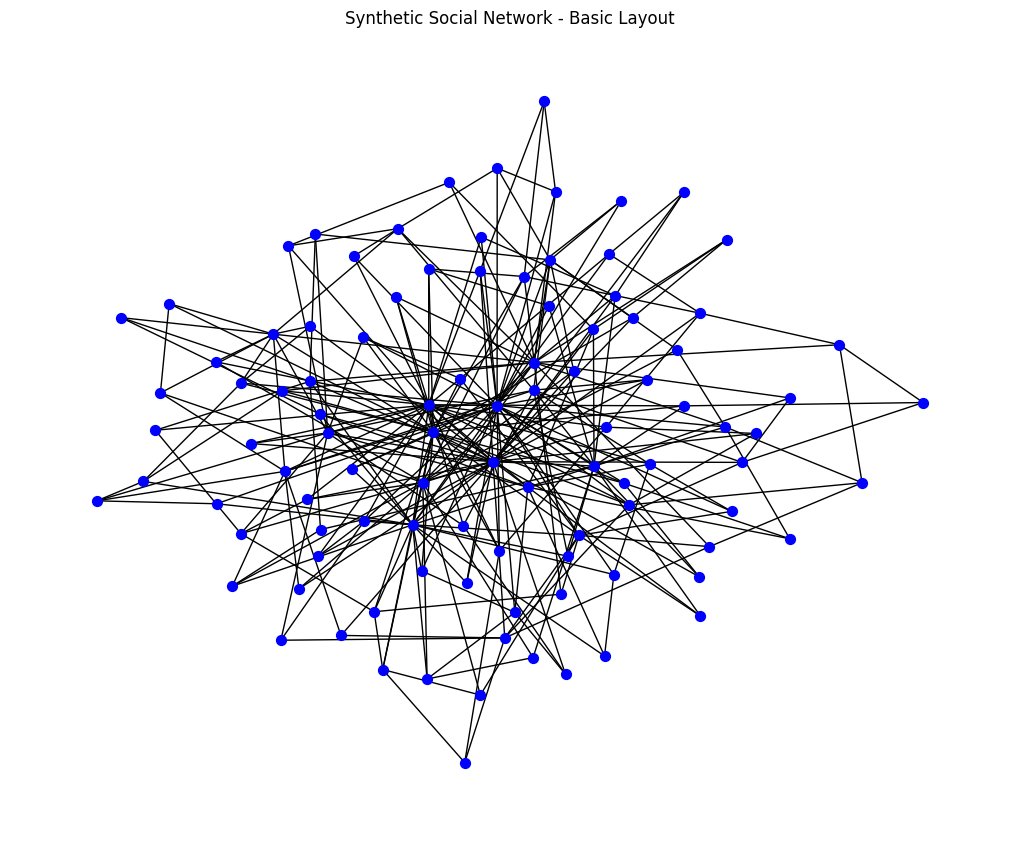

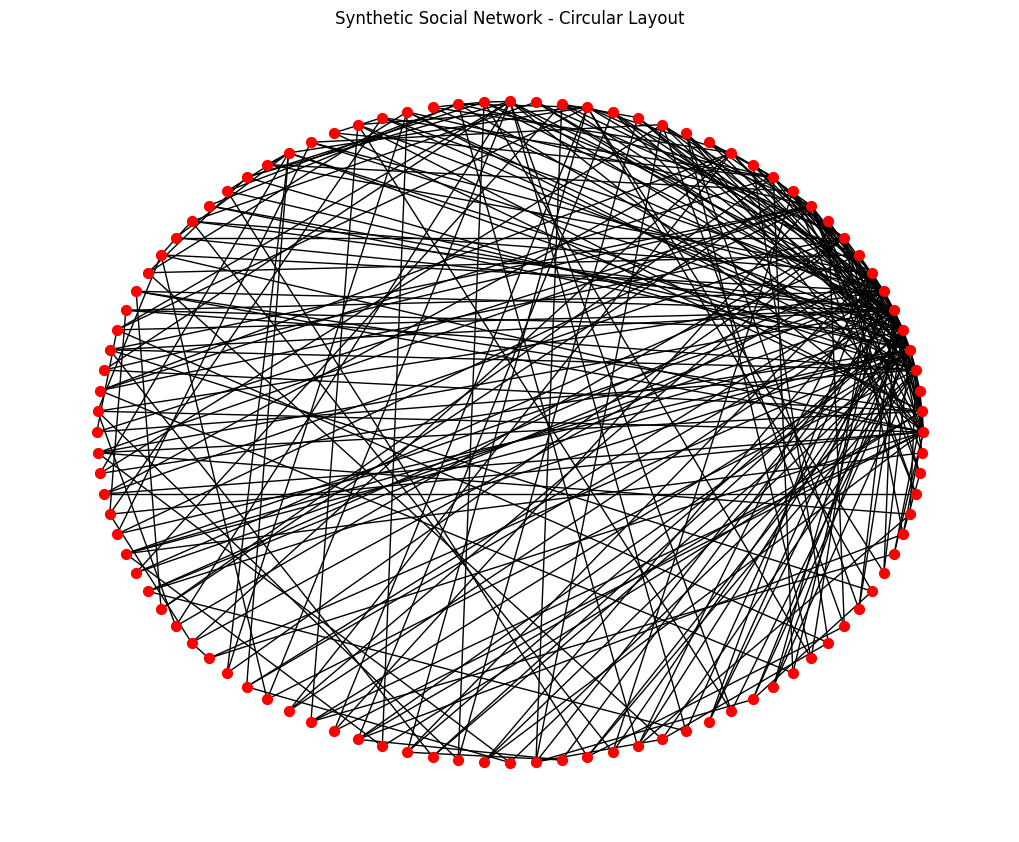

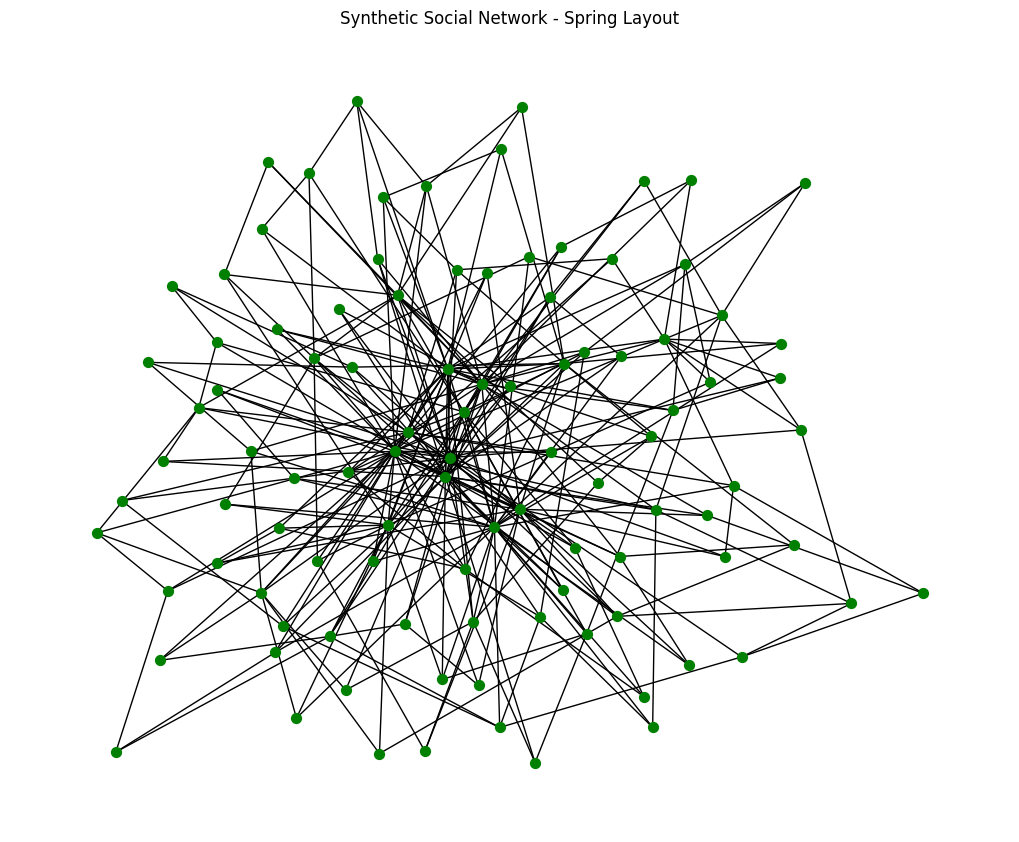

In [ ]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
import numpy as np

# Task 19: Create synthetic social network and apply various visualizations
G = nx.barabasi_albert_graph(100, 3, seed=42)

# Visualization 1: Basic layout
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=50, node_color='blue', with_labels=False)
plt.title("Synthetic Social Network - Basic Layout")
plt.show()

# Visualization 2: Circular layout
plt.figure(figsize=(10, 8))
nx.draw_circular(G, node_size=50, node_color='red', with_labels=False)
plt.title("Synthetic Social Network - Circular Layout")
plt.show()

# Visualization 3: Spring layout with edge weights
plt.figure(figsize=(10, 8))
nx.draw_spring(G, node_size=50, node_color='green', with_labels=False)
plt.title("Synthetic Social Network - Spring Layout")
plt.show()

# Task 20: Calculate degree, closeness, and eigenvector centrality for nodes
**bold text**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
import numpy as np
degree_cent = nx.degree_centrality(G)
closeness_cent = nx.closeness_centrality(G)
eigenvector_cent = nx.eigenvector_centrality(G)

# Find top 5 nodes for each centrality measure
top_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True)[:5]
top_eigenvector = sorted(eigenvector_cent.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by degree centrality (most connections):", top_degree)
print("Top 5 nodes by closeness centrality (closest to all others):", top_closeness)
print("Top 5 nodes by eigenvector centrality (connected to influential nodes):", top_eigenvector)

Top 5 nodes by degree centrality (most connections): [(4, 0.30303030303030304), (5, 0.2828282828282829), (6, 0.26262626262626265), (0, 0.23232323232323235), (7, 0.23232323232323235)]
Top 5 nodes by closeness centrality (closest to all others): [(4, 0.5722543352601156), (0, 0.553072625698324), (5, 0.55), (6, 0.5380434782608695), (7, 0.5294117647058824)]
Top 5 nodes by eigenvector centrality (connected to influential nodes): [(5, 0.3350602500761958), (4, 0.33060775714795454), (0, 0.3048614798391552), (7, 0.28038887820078806), (6, 0.268867732415879)]


**# Task 21: Sentiment analysis for Patanjali products using TextBlob (Lexalytics alternative)**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
import numpy as np
texts = [
    "Patanjali products are amazing, I love them!",
    "The quality of Patanjali items is subpar.",
    "I had a great experience with Patanjali customer service.",
    "The packaging of Patanjali products is poor.",
    "Patanjali offers great value for money."
]

sentiments = [(text, TextBlob(text).sentiment.polarity) for text in texts]
positive = sorted(sentiments, key=lambda x: x[1], reverse=True)[:2]
negative = sorted(sentiments, key=lambda x: x[1])[:2]

print("\nTop positive phrases about Patanjali products:")
for text, polarity in positive:
    print(f"{text}: {polarity}")

print("\nTop negative phrases about Patanjali products:")
for text, polarity in negative:
    print(f"{text}: {polarity}")


Top positive phrases about Patanjali products:
I had a great experience with Patanjali customer service.: 0.8
Patanjali products are amazing, I love them!: 0.6125

Top negative phrases about Patanjali products:
The packaging of Patanjali products is poor.: -0.4
The quality of Patanjali items is subpar.: 0.0


**# Task 22: Track engagement metrics for two educational institutions**



Average engagement metrics:
                              Date       Likes     Shares   Comments
Institution   Platform                                              
Institution A Facebook  2023-02-12  190.846154  25.384615  13.384615
              Instagram 2023-02-12  153.307692  26.076923  12.769231
Institution B Facebook  2023-02-12  191.692308  30.769231  49.307692
              Instagram 2023-02-12  203.769231  33.846154  11.230769


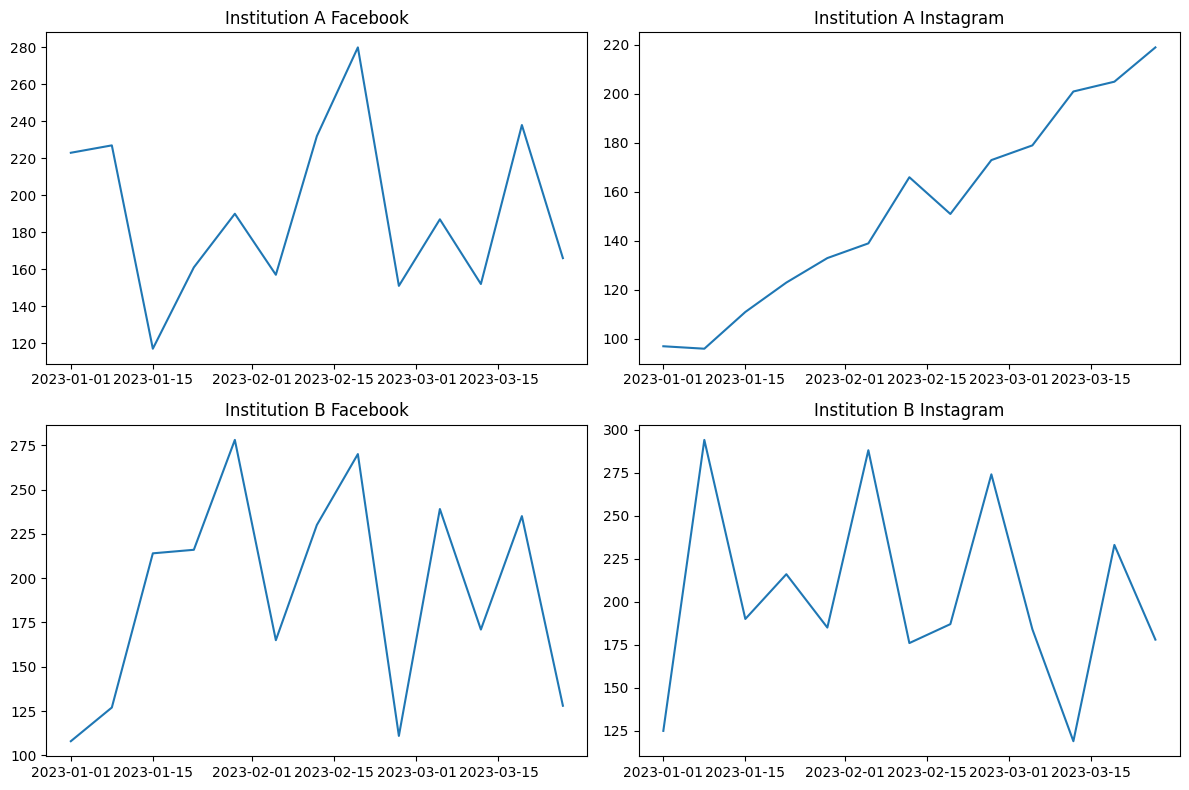


Observed trends:
Institution A: Increasing likes on Instagram, suggesting a growing audience or effective content strategy.
Institution B: Higher and increasing comments on Facebook, indicating active engagement or discussion.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
import numpy as np
dates = pd.date_range(start='2023-01-01', end='2023-03-31', freq='W')
data = []

for i, date in enumerate(dates):
    for institution in ['Institution A', 'Institution B']:
        for platform in ['Facebook', 'Instagram']:
            if institution == 'Institution A' and platform == 'Instagram':
                likes = 100 + 10 * i + np.random.randint(-20, 20)  # Increasing trend
            else:
                likes = np.random.randint(100, 300)
            if institution == 'Institution B' and platform == 'Facebook':
                comments = 20 + 5 * i + np.random.randint(-5, 5)  # Increasing trend
            else:
                comments = np.random.randint(5, 20)
            shares = np.random.randint(10, 50)
            data.append([institution, platform, date, likes, shares, comments])

df = pd.DataFrame(data, columns=['Institution', 'Platform', 'Date', 'Likes', 'Shares', 'Comments'])

# Analyze average metrics
grouped = df.groupby(['Institution', 'Platform']).mean()
print("\nAverage engagement metrics:")
print(grouped)

# Plot likes over time for each institution and platform
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
institutions = ['Institution A', 'Institution B']
platforms = ['Facebook', 'Instagram']

for i, institution in enumerate(institutions):
    for j, platform in enumerate(platforms):
        subset = df[(df['Institution'] == institution) & (df['Platform'] == platform)]
        axes[i, j].plot(subset['Date'], subset['Likes'])
        axes[i, j].set_title(f"{institution} {platform}")

plt.tight_layout()
plt.show()

# Observed trends in social media strategies (based on synthetic data)
print("\nObserved trends:")
print("Institution A: Increasing likes on Instagram, suggesting a growing audience or effective content strategy.")
print("Institution B: Higher and increasing comments on Facebook, indicating active engagement or discussion.")

**23.	Calculate degree, closeness, and eigenvector centrality for nodes in the social graph. Interpret the significance.**

In [ ]:
!wget https://snap.stanford.edu/data/facebook_combined.txt.gz
!gunzip facebook_combined.txt.gz

--2025-05-04 19:46:38--  https://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   178KB/s    in 1.2s    

2025-05-04 19:46:40 (178 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]

gzip: facebook_combined.txt already exists; do you wish to overwrite (y or n)? y


In [ ]:
import networkx as nx

G = nx.read_edgelist('facebook_combined.txt')
degree_cent = nx.degree_centrality(G)
closeness_cent = nx.closeness_centrality(G)
eigenvector_cent = nx.eigenvector_centrality(G)
top_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True)[:5]
top_eigenvector = sorted(eigenvector_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality (most connections):", top_degree)
print("Top 5 nodes by closeness centrality (quick access to others):", top_closeness)
print("Top 5 nodes by eigenvector centrality (connected to influential nodes):", top_eigenvector)

Top 5 nodes by degree centrality (most connections): [('107', 0.258791480931154), ('1684', 0.1961367013372957), ('1912', 0.18697374938088163), ('3437', 0.13546310054482416), ('0', 0.08593363051015354)]
Top 5 nodes by closeness centrality (quick access to others): [('107', 0.45969945355191255), ('58', 0.3974018305284913), ('428', 0.3948371956585509), ('563', 0.3939127889961955), ('1684', 0.39360561458231796)]
Top 5 nodes by eigenvector centrality (connected to influential nodes): [('1912', 0.09540696149067629), ('2266', 0.08698327767886552), ('2206', 0.08605239270584342), ('2233', 0.08517340912756598), ('2464', 0.08427877475676092)]


**24.	Analyze Zachary's Karate Club network using NetworkX. Perform the following tasks:**
a.	Visualize the graph with node labels.
b.	Calculate and report the top 5 nodes based on:
     a. Degree centrality
     b. Closeness centrality
     c. Betweenness centrality
     d. Eigenvector centrality

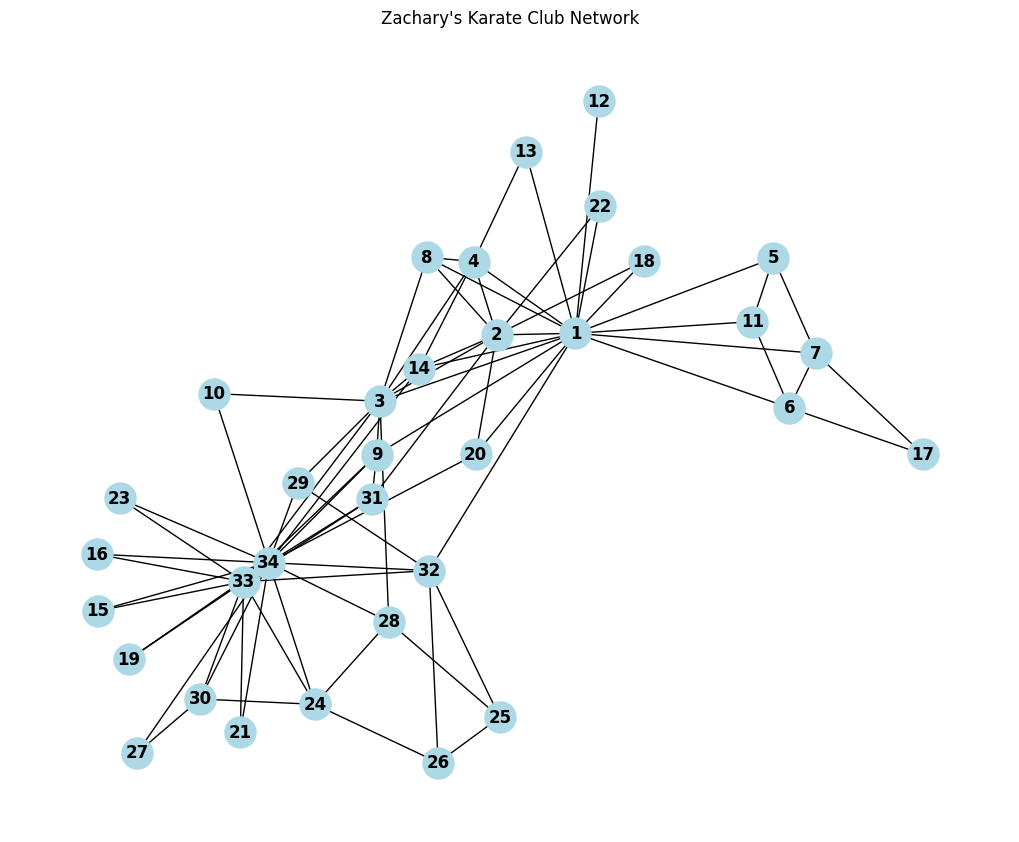

Top 5 nodes by Degree Centrality:
[(np.int64(34), 0.5151515151515151), (np.int64(1), 0.48484848484848486), (np.int64(33), 0.36363636363636365), (np.int64(3), 0.30303030303030304), (np.int64(2), 0.2727272727272727)]

Top 5 nodes by Closeness Centrality:
[(np.int64(1), 0.5689655172413793), (np.int64(3), 0.559322033898305), (np.int64(34), 0.55), (np.int64(32), 0.5409836065573771), (np.int64(9), 0.515625)]

Top 5 nodes by Betweenness Centrality:
[(np.int64(1), 0.43763528138528146), (np.int64(34), 0.30407497594997596), (np.int64(33), 0.14524711399711404), (np.int64(3), 0.14365680615680615), (np.int64(32), 0.13827561327561327)]

Top 5 nodes by Eigenvector Centrality:
[(np.int64(34), 0.373371213013235), (np.int64(1), 0.35548349418519426), (np.int64(3), 0.3171893899684447), (np.int64(33), 0.30865104773369595), (np.int64(2), 0.2659538704545024)]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request

# Download dataset
url = "http://konect.cc/files/download.tsv.ucidata-zachary.tar.bz2"
urllib.request.urlretrieve(url, "zachary.tar.bz2")

# Extract and load data
import tarfile, io
with tarfile.open("zachary.tar.bz2", "r:bz2") as tar:
    edges_file = tar.extractfile("ucidata-zachary/out.ucidata-zachary")
    edges_data = pd.read_csv(io.BytesIO(edges_file.read()),
                             sep='\s+',
                             comment='%',
                             header=None)

# Create graph
G = nx.Graph()
for _, row in edges_data.iterrows():
    G.add_edge(row[0], row[1])

# Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=500, font_weight='bold')
plt.title("Zachary's Karate Club Network")
plt.show()

# Calculate centrality measures
degree_cent = nx.degree_centrality(G)
closeness_cent = nx.closeness_centrality(G)
betweenness_cent = nx.betweenness_centrality(G)
eigenvector_cent = nx.eigenvector_centrality(G)

# Function to get top 5 nodes
def top_5(centrality_dict):
    return sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Print results
print("Top 5 nodes by Degree Centrality:")
print(top_5(degree_cent))

print("\nTop 5 nodes by Closeness Centrality:")
print(top_5(closeness_cent))

print("\nTop 5 nodes by Betweenness Centrality:")
print(top_5(betweenness_cent))

print("\nTop 5 nodes by Eigenvector Centrality:")
print(top_5(eigenvector_cent))

**25.	Analyze Zachary's Karate Club network using NetworkX. Detect communities using the Girvan–Newman algorithm and interpret the splits.**

Number of communities: 2

Communities:
Community 1: [np.int64(1), np.int64(2), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(17), np.int64(18), np.int64(20), np.int64(22)]
Community 2: [np.int64(3), np.int64(9), np.int64(10), np.int64(15), np.int64(16), np.int64(19), np.int64(21), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34)]


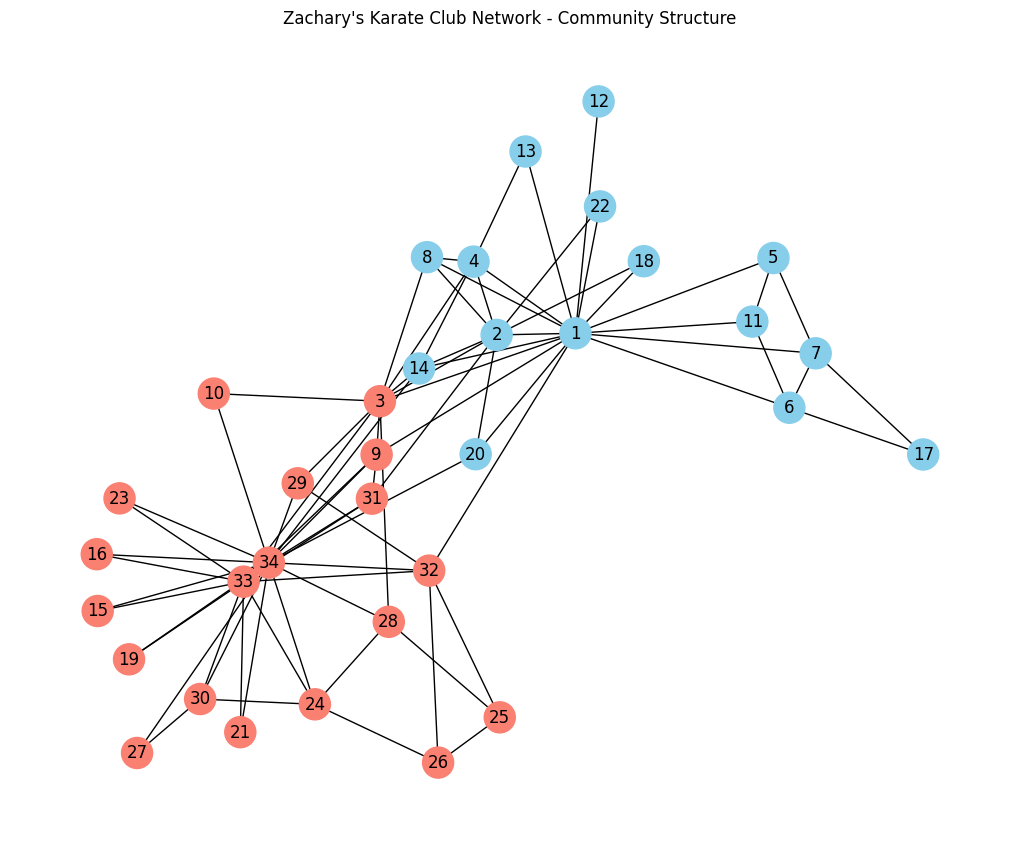


Accuracy compared to historical split: 97.06%


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
import numpy as np
import tarfile, io
import community as community_louvain
from collections import defaultdict

# Download dataset
url = "http://konect.cc/files/download.tsv.ucidata-zachary.tar.bz2"
urllib.request.urlretrieve(url, "zachary.tar.bz2")

# Extract and load data
with tarfile.open("zachary.tar.bz2", "r:bz2") as tar:
    edges_file = tar.extractfile("ucidata-zachary/out.ucidata-zachary")
    edges_data = pd.read_csv(io.BytesIO(edges_file.read()),
                             sep='\s+',
                             comment='%',
                             header=None)

# Create graph
G = nx.Graph()
for _, row in edges_data.iterrows():
    G.add_edge(row[0], row[1])

# Apply Girvan-Newman algorithm
comp = nx.community.girvan_newman(G)

# Get first two community partitions (historical split)
communities = tuple(sorted(c) for c in next(comp))
print(f"Number of communities: {len(communities)}")
print("\nCommunities:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {sorted(community)}")

# Plot communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Color nodes based on community
colors = ['skyblue', 'salmon']
color_map = []
for node in G.nodes():
    for idx, comm in enumerate(communities):
        if node in comm:
            color_map.append(colors[idx])
            break

nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=500)
plt.title("Zachary's Karate Club Network - Community Structure")
plt.show()

# Compare with historical split
# Nodes 1-33 with Mr. Hi (node 1) vs. John A (node 34)
historical_split = {
    "Mr. Hi's group": [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22],
    "John A's group": [9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
}

# Calculate accuracy of detected communities vs historical split
total_correct = 0
for node in G.nodes():
    # Check if node is in the same community as its leader (1 or 34)
    hi_group = 1 in communities[0]
    john_group = 34 in communities[1]
    node_comm = 0 if node in communities[0] else 1

    if (node in historical_split["Mr. Hi's group"] and
        ((hi_group and node_comm == 0) or (not hi_group and node_comm == 1))):
        total_correct += 1
    elif (node in historical_split["John A's group"] and
          ((john_group and node_comm == 1) or (not john_group and node_comm == 0))):
        total_correct += 1

accuracy = total_correct / len(G.nodes()) * 100
print(f"\nAccuracy compared to historical split: {accuracy:.2f}%")